In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.datasets import load_iris
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical

## Charger le dataset IRIS

In [10]:
df = load_iris()
df = pd.DataFrame(data= np.c_[df['data'], df['target']], columns= df['feature_names'] + ['target'])
x = df.drop('target', axis=1)
y = df['target']

## Modifier le Y pour le transormer en vecteur de 0 et 1

In [24]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Normalisation des donnée

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split des données

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)

## Créer un modèle de classification

In [29]:
model = Sequential([
	Dense(25, activation='relu', input_shape=(4,)),
	Dense(25, activation='relu'),
	Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=15)

Epoch 1/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3492 - loss: 0.7139 - val_accuracy: 0.3000 - val_loss: 0.6996
Epoch 2/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3715 - loss: 0.6876 - val_accuracy: 0.3333 - val_loss: 0.6763
Epoch 3/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4192 - loss: 0.6706 - val_accuracy: 0.5000 - val_loss: 0.6552
Epoch 4/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5587 - loss: 0.6471 - val_accuracy: 0.6667 - val_loss: 0.6355
Epoch 5/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6823 - loss: 0.6256 - val_accuracy: 0.6667 - val_loss: 0.6172
Epoch 6/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6894 - loss: 0.6157 - val_accuracy: 0.7667 - val_loss: 0.6002
Epoch 7/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7394 - loss: 0.5958 - val_accuracy: 0.8000 - val_loss: 0.5840


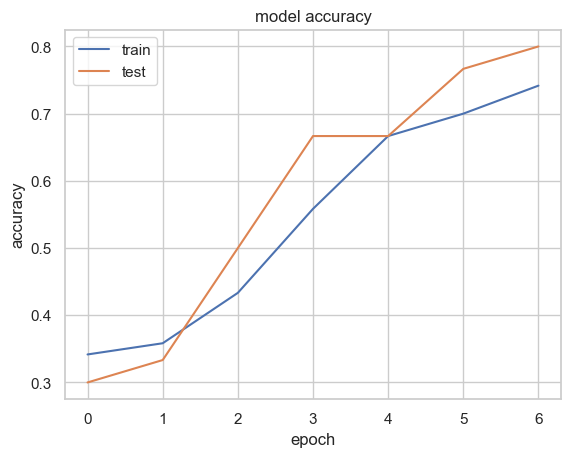

In [31]:
sns.set(style='whitegrid')
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()